# Unlocking YouTube Channel Performance Secrets

##### YouTube video analytics, capturing keymetrics related to video performance, audience engagement, revenue generation, andviewer behavior. Sourced from real video data, it highlights how variables like videoduration, upload time, and ad impressions contribute to monetization and audienceretention. This dataset is ideal for data analysts, content creators, and marketersaiming to uncover trends in viewer engagement, optimize content strategies, andmaximize ad revenue. Inspired by the evolving landscape of digital content, it serves asa resource for understanding the impact of YouTube metrics on channel growth and content reach.


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data

In [2]:
ytb=pd.read_csv(r"C:\Users\minal\Downloads\internship\youtube_channel_real_performance_analytics.csv")
ytb.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [3]:
#Checking the info:
ytb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [4]:
#Checking the null values:
ytb.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [5]:
# Drop null values:
ytb= ytb.dropna()

In [6]:
# Preview the dataset
ytb.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [7]:
# Convert 'Video Duration' into seconds
ytb['Video Duration (seconds)'] = ytb['Video Duration'].apply(lambda x: int(float(x)))

In [8]:
# Preview the dataset after converting vedio into seconds
ytb.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Video Duration (seconds)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66,201
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85,391
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07,133
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60,14
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62,45


### Exploratory Data Analysis (EDA)

C:\Users\minal\.anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


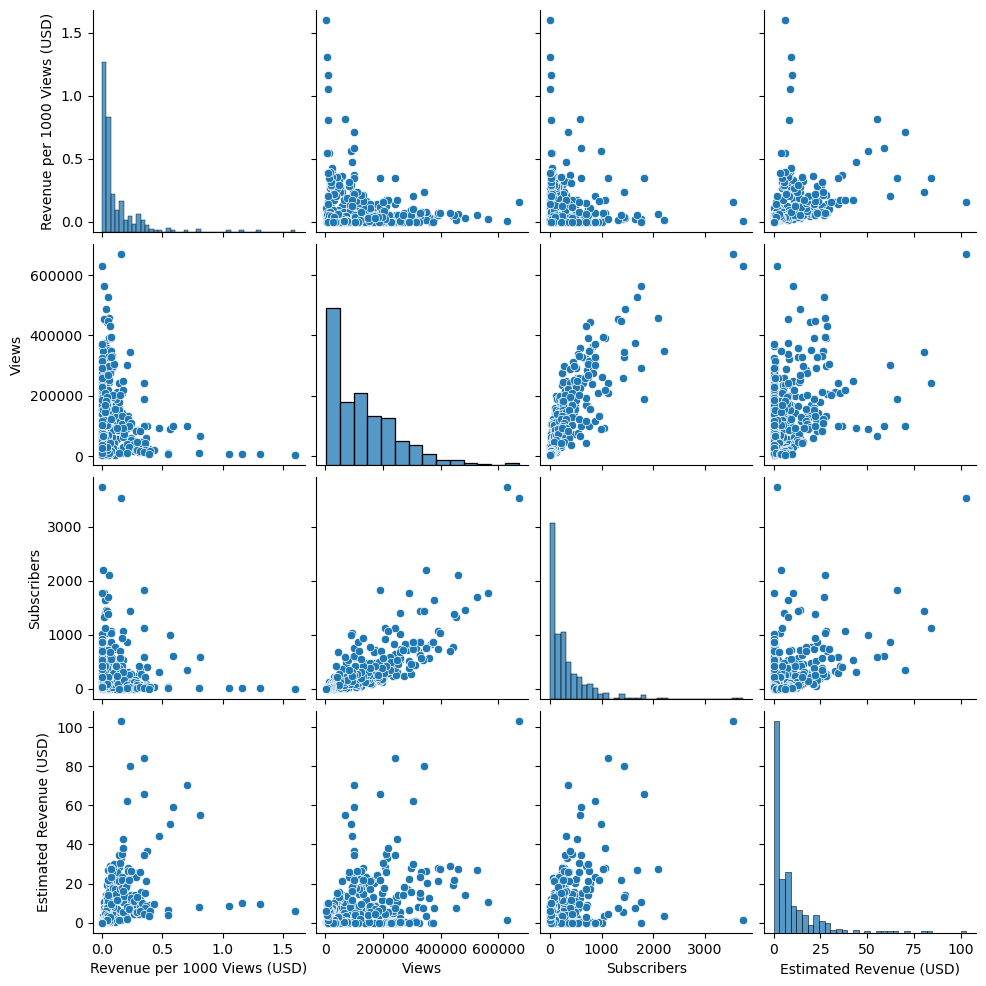

In [11]:
# Pairplot to visualize relationships
sns.pairplot(ytb[['Revenue per 1000 Views (USD)', 'Views','Subscribers', 'Estimated Revenue (USD)']])
plt.show()

### Correlation Heatmap: 

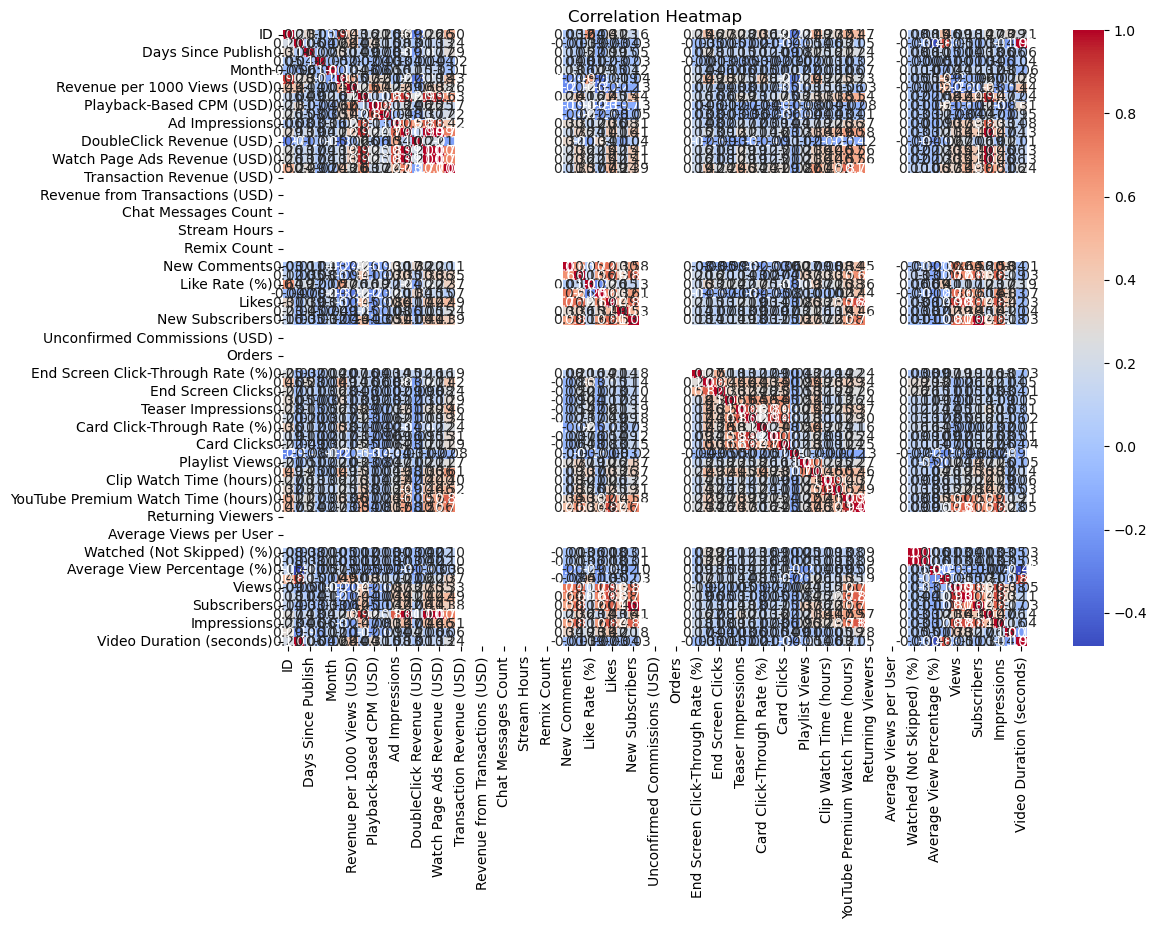

In [12]:
 # Drop non-numeric columns
numeric_ytb = ytb.select_dtypes(include=['number'])

# Now create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_ytb.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Top Performers by Revenue:

In [13]:
 top_videos = ytb.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)
 print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


In [14]:
#check all columns names in data:
print(ytb.columns)

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

### Feature Engineering:

In [15]:
# Create revenue per view
ytb['Revenue per 1000 Views (USD)'] = ytb['Estimated Revenue (USD)'] / ytb['Views']

In [16]:
 # Create engagement rate
 ytb['Engagement Rate'] = (ytb['Likes'] + ytb['Shares'] + ytb['New Comments']) / ytb['Views'] * 100

### Data Visualization Revenue Distribution:

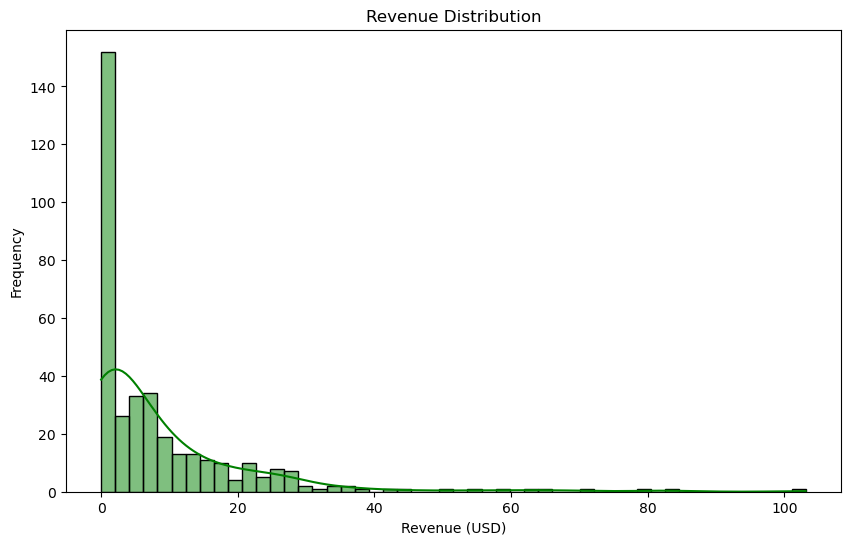

In [17]:
 plt.figure(figsize=(10, 6))
 sns.histplot(ytb['Estimated Revenue (USD)'], bins=50,kde=True, color='green')
 plt.title("Revenue Distribution")
 plt.xlabel("Revenue (USD)")
 plt.ylabel("Frequency")
 plt.show()

### Revenue vs Views:

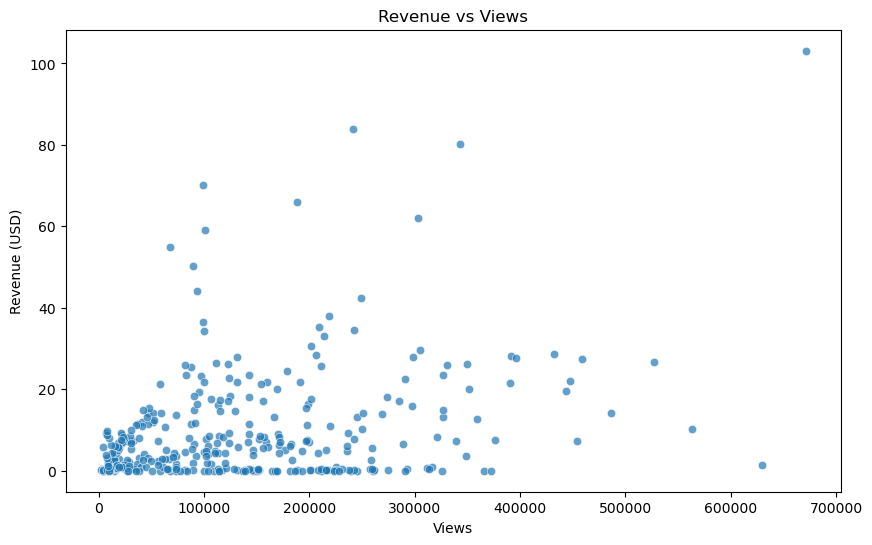

In [18]:
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x= ytb['Views'], y= ytb['Estimated Revenue (USD)'], alpha=0.7)
 plt.title("Revenue vs Views")
 plt.xlabel("Views")
 plt.ylabel("Revenue (USD)")
 plt.show()

### Estimate Revenue Prepare Data:

In [19]:
# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X = ytb[features]
y = ytb[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Random Forest Regressor:

In [20]:
 model = RandomForestRegressor(n_estimators=100,random_state=42)
 model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predict on test data
y_pred = model.predict(X_test)

### Evaluate the Model:

In [23]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 75.70
R-squared: 0.13


### Insights and Recommendations:

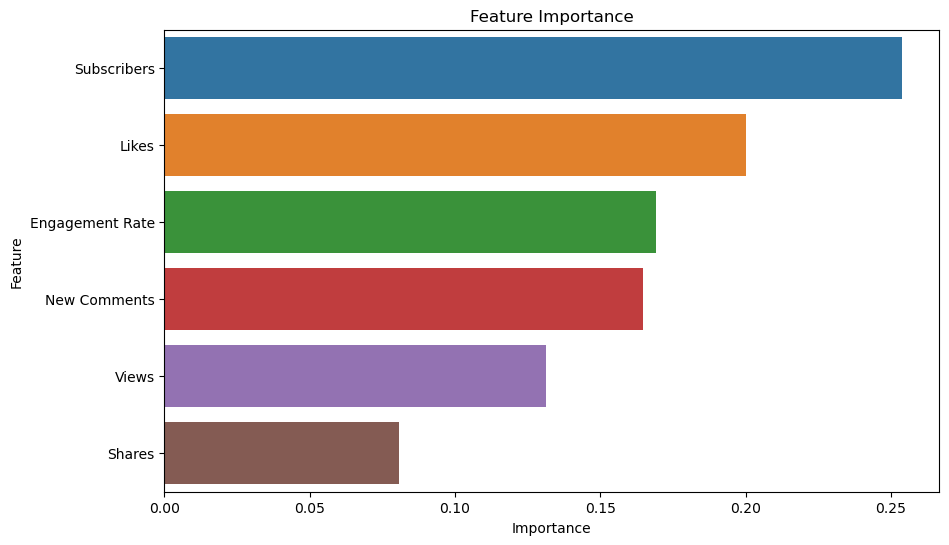

In [24]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features,'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

### Deployment and Presentation

In [25]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']

In [ ]:
----------------------------END-------------------------------------------------------------------------------------------------